In [5]:
from IPython.display import Image
from astropy.table import Table
import plot_stats
import add_data
%matplotlib inline
labels = [['20170214', 'closed', 806], ['20170215', 'closed', 806], ['20170216', 'closeda', 806],['20170217', 'closeda', 1000], ['20170218', 'closeda', 658]]
data_dir_root = "/Users/fatimaabdurrahman/Desktop/Research/RUN4/"; stats_dir_end = "/FLI/reduce/stats/"

# Observations

We observed the Pleiades for the days of February 13-17 (HST).  Using the University of Hawaii 2.2 meter telescope with an FLI camera with a 4872 x 3248 pixel imaging array.  The field of view used, spanning 5.4' by 4.1', is shown in the image below.  Images were taken with exposure times of 30-45 in the I band, R band, and at 1 micron.

In addition to our science images, we took dithered sky images throughout the night as well as twilights at the begining of each run for use as flat field images. 

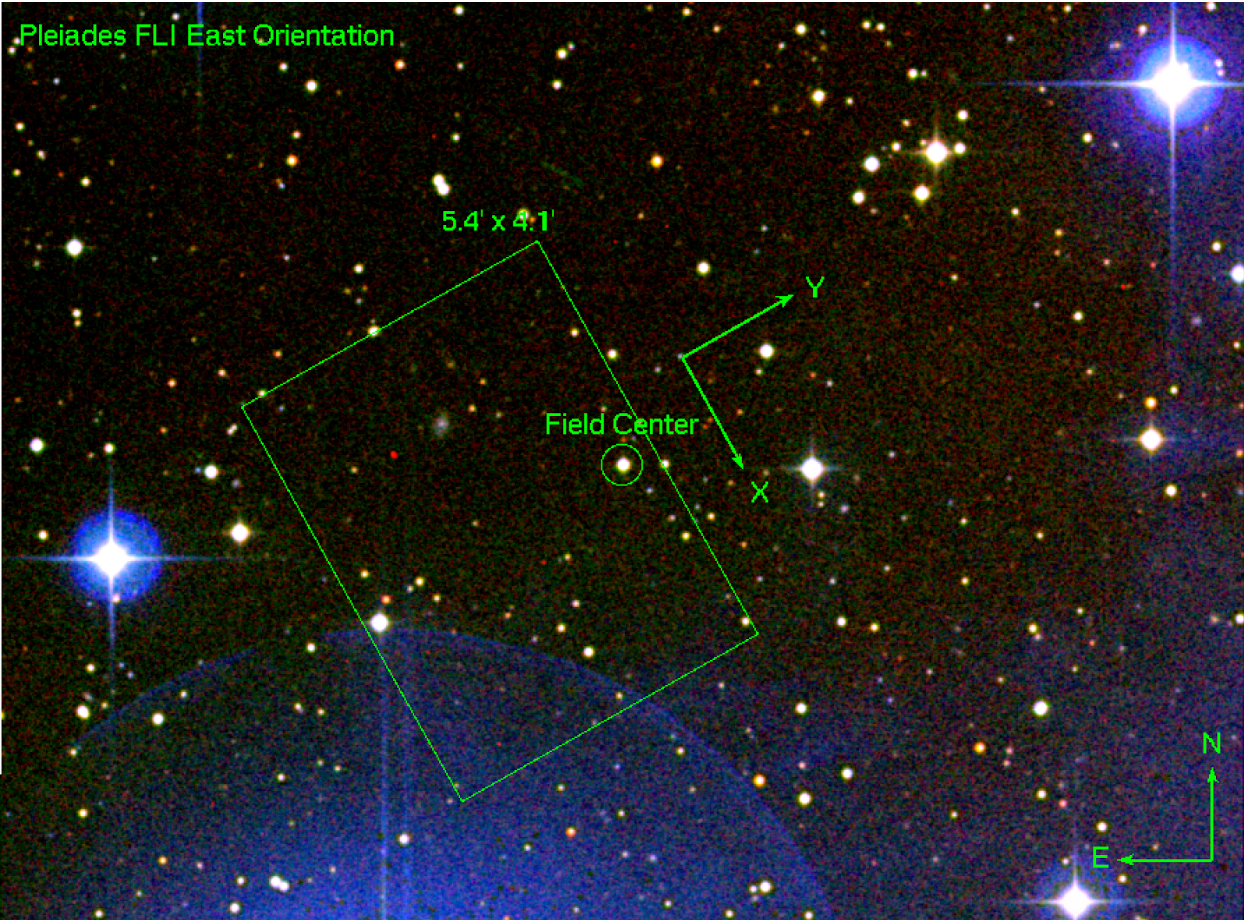

In [20]:
Image(filename = "/Users/fatimaabdurrahman/Desktop/FOV.png", width=500, height=500)

# Reduction

### Image Processing

Several twilights at different exposure times (2-30 seconds) were normalized (each divided by sigma clipped median of all pixels in the image) and then combined (again, sigma clipped median, now between all images) to make one flat.  Monday night didn't have twilights, so the flat generated from Tuesday's data was used for reducing Monday's images.

Sky images were taken periodically through the observing run each night, usually with a total of about 20 frames.  Like the flats, all skies of a given night were combined using a sigma clipping median routine.  The images were dithered to remove any stars from the final combined sky.

For each night, our reduction pipeline subtracted the combined sky and divided the resulting image by that night's master flat, with the exception of Monday's data, which used Tuesday's flat.  


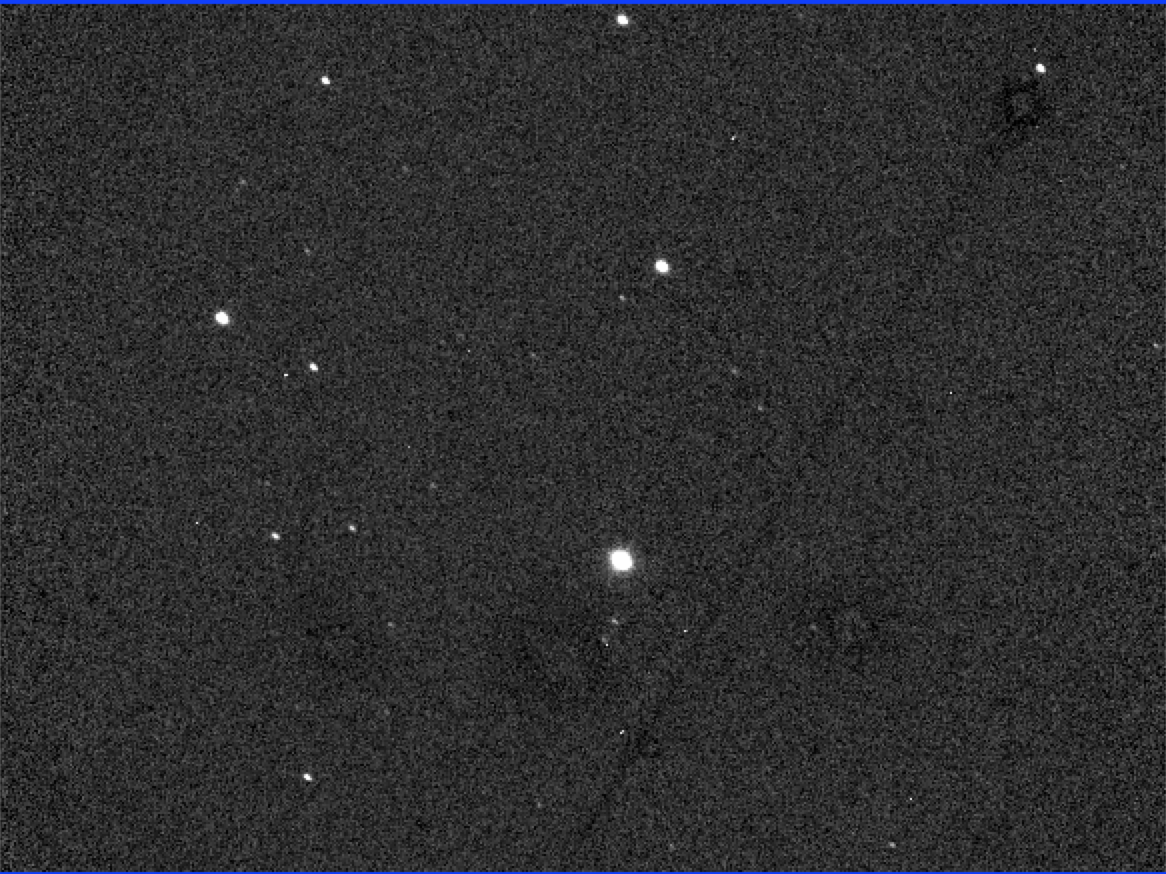

In [8]:
Image(filename = "/Users/fatimaabdurrahman/Desktop/field.png", width=500, height=500)

### Metrics

After calibrating the science images, each frame was reduced to a single 'star'.  Using DAOStarFinder, we located all the sources in a single frame (usually about 15 sources, spanning the whole field of view as shown in the figure below).  We then created a flux weighted average PSF of all the stars in a frame above a minimum flux threshold.  Thus each frame was reduced to one star.  We used a variety of metrics to compare the PSF between open and closed loop for these composite stars, described below.

##### Empirical Full Width Half Max

Inital attempts to fit the stars to gaussians resulted in poor models (why?), so rather than use a gaussian, we empirically measured the full width half max (FWHM) of each source.  For each source, we counted pixels in the vicinity of a star's centroid with ADU counts above half of the maximum pixel value.  These pixels defined an area from which we extracted a diameter, the empirical full width half max.

Because the empirical FWHM measurments were ultimately compared to the seeing at the time of observation, and the MASS/DIMM seeing measurments on Mauna Kea are taken at 500 nm, our data, which was taken at various wavelengths, had to be scaled accordingly.  For a given wavelength $\lambda$, the Fried parameter describing amount of wavefront distortion due to atmospheric turbulence scales as

$$r_o \sim \lambda^{6/5}$$


To scale the data to the seeing $\alpha$ at a given wavelength, we make use of this relationship and the definition of a seeing disk to obtain an equation for our calibration:

$$\alpha \sim \frac{\lambda}{r_o} \sim \lambda^{-1/5} \rightarrow \alpha_{data} = \alpha_{500 nm} \cdot (\frac{500 nm}{\lambda_{data}})^{1/5}$$

where $\alpha_{data}$ is the FWHM in our images.  All figures displaying empirical FWHM measurments have been scaled in this way.

##### Encircled Energy

To obtain a more detailed profile of the sources' PSFs, we also calculated encircled energies for our sources.  We created brightness profiles of each sources, counting flux countained within a series of concentric annuli centered on the source's centroid.  From this profile, we measured the radius at which 25%, 50%, and 80% of the total flux was enclosed. These data should give us a more detailed idea of the shape of the PSF, rather than just the single metric of the FWHM.


##### Noise Equivalent Area

Described in King, 1983.  Come back and give some summary of the calculation

# Analysis


### Nightly Summary

The table below gives a summary of the conditions (average MASS and DIMM seeing over the course of the observing time) and results (average empirical FWHM of all images for open and closed) of each observing night. 

In [7]:
add_data.week_table(data_dir_root, stats_dir_end, labels)
Table.read(data_dir_root+"nightly_aves.fits")

<Table length=5>
 HST_Date  ave_open_fwhm  ave_closed_fwhm    ave_DIMM       ave_MASS   
  str10       float64         float64        float64        float64    
---------- -------------- --------------- -------------- --------------
2017-02-14 0.581156058725  0.366300311171 0.574107142857 0.212142857143
2017-02-15 0.651373227063  0.402526759364 0.617555555556 0.143555555556
2017-02-16 0.814920140028  0.395654981713  1.10642857143 0.167857142857
2017-02-17 0.634875902312  0.363488548905 0.511186440678 0.332372881356
2017-02-18 0.554401747185  0.286140006908 0.362173913043 0.117826086957

### FWHM vs Seeing

The data in the plot below shows empirical FWHM as a function of seeing, each data point representing one frame.  Ideally, the FWHM in open loop should match the DIMM seeing, while the closed loop should match MASS seeing, having data points fall along the diagonal black line.  Though open loop data at high seeing seems to be better than ideal, our closed loop data is generally above the black line, that is, not reaching the PSF we expect from the seeing measurments.

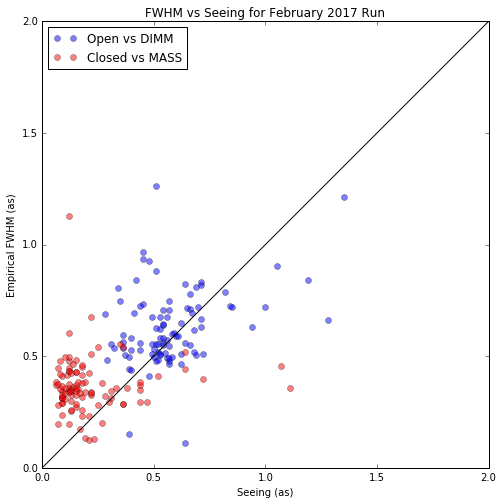

In [3]:
plot_stats.plot_week_fwhm(labels, data_dir_root, stats_dir_end, "FWHM vs Seeing for February 2017 Run")

### FWHM Histogram

The histogram below represents the distribtion of empirical FWHM measured in all the data, comparing open and closed loop observations.  Besides the clear shift of the distribution to lower FWHM in closed loop, the shape of the distrubtion is notably different as well, showing a narrower spread in closed loop.

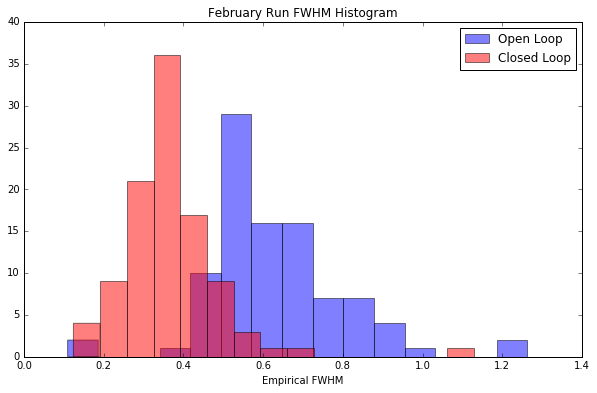

In [41]:
plot_stats.plot_hist(labels, data_dir_root, stats_dir_end, 'February Run FWHM Histogram')

### Encircled Energy Profile

The plots below show the ratio of closed to open loop encircled energies as a function of the difference between DIMM and MASS seeing.  Besides the lack of correlation between fractional improvment of the EE and seeing, we were suprised to see the discrepancy between improvements in the FWHM and in the 50% EE diameter.  Though the sharpness of the brightness profile could create some difference between these two metrics, we expect to see similar amounts of improvement; while the FWHMs improve by almost a factor of two, the 50% EE improves on average by only about 25%.

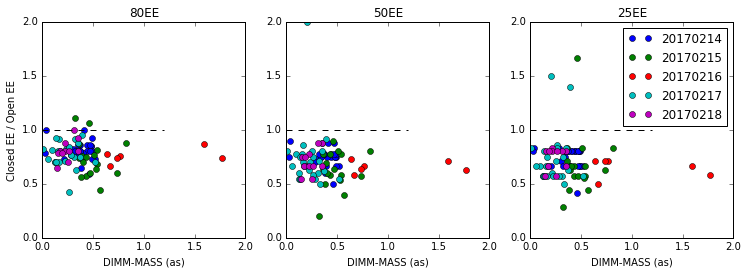

In [21]:
plot_stats.plot_EE(labels, data_dir_root, stats_dir_end)

### Nightly FWHM with Seeing 

Each data point in the plots below represent the average FWHM of all sources in a single frame. The solid lines represent the MASS-DIMM seeing as reported by Mauna Kea Weather Services. Only seeing observations at the same time as images are shown below.  In addition to matching the seeing data to the times of observations, the times of closed loop images were matched as closely as possible in time to the open loop frame in an attempt to show the difference in open and closed loop images with the same seeing conditions.

Looking at the plots, the DIMM seeing generally does a good job of tracing the open loop data.  The MASS doesn't trace closed loop quite as well, particularly at very low seeing conditions.  Our data generally follows the seeing data up until a minimum of around 0.3 as, where our FWHM seems to reach a lower limit.  Potentially augmenting this discrepancy, the MASS software on Mauna Kea may currently be overestimating their seeing, calling this data 'prelimiary'.

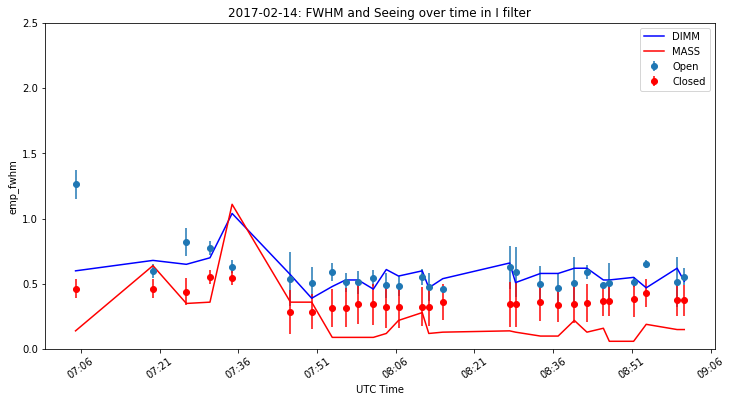

In [12]:
root_dir = data_dir_root+"20170214"+"/FLI/reduce/"; open_file = root_dir + "stats/stats_open_mdp.fits"; closed_file = root_dir + "stats/stats_closed_mdp.fits"; plots_dir = root_dir + "plots/"
plot_stats.plot_fwhmvt(open_file, closed_file, 'emp_fwhm', 806, "2017-02-14: FWHM and Seeing over time in I filter", plots_dir)

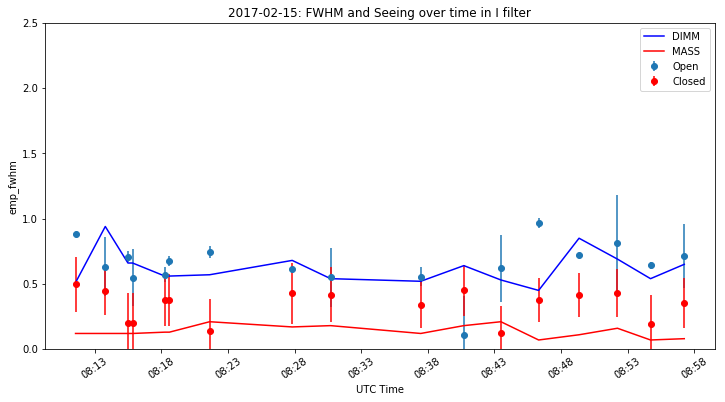

In [13]:
root_dir = data_dir_root+"20170215"+"/FLI/reduce/"; open_file = root_dir + "stats/stats_open_mdp.fits"; closed_file = root_dir + "stats/stats_closed_mdp.fits"; plots_dir = root_dir + "plots/"
plot_stats.plot_fwhmvt(open_file, closed_file, 'emp_fwhm', 806, "2017-02-15: FWHM and Seeing over time in I filter", plots_dir)

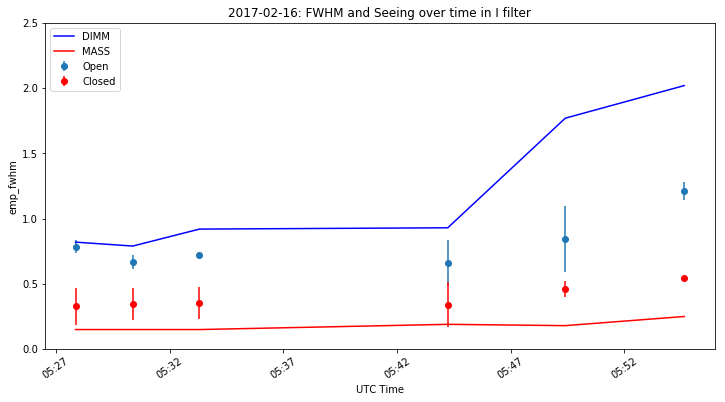

In [14]:
root_dir = "/Users/fatimaabdurrahman/Desktop/Research/RUN4/20170216/FLI/reduce/"; open_file = root_dir + "stats/stats_open_mdp.fits"; closed_file = root_dir + "stats/stats_closeda_mdp.fits"; plots_dir = root_dir + "plots/"
plot_stats.plot_fwhmvt(open_file, closed_file, 'emp_fwhm', 806, "2017-02-16: FWHM and Seeing over time in I filter", plots_dir)

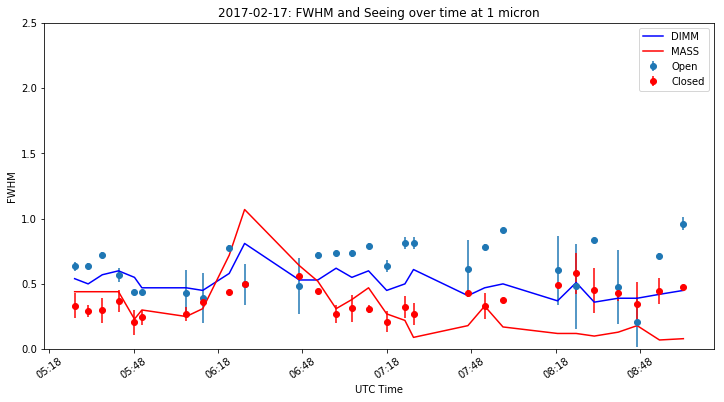

In [15]:
root_dir = "/Users/fatimaabdurrahman/Desktop/Research/RUN4/20170217/FLI/reduce/"; open_file = root_dir + "/stats/stats_open_mdp.fits"; closed_file = root_dir + "/stats/stats_closeda_mdp.fits"; plots_dir = root_dir + "plots/"
plot_stats.plot_fwhmvt(open_file, closed_file, 'FWHM', 1000, "2017-02-17: FWHM and Seeing over time at 1 micron", plots_dir)

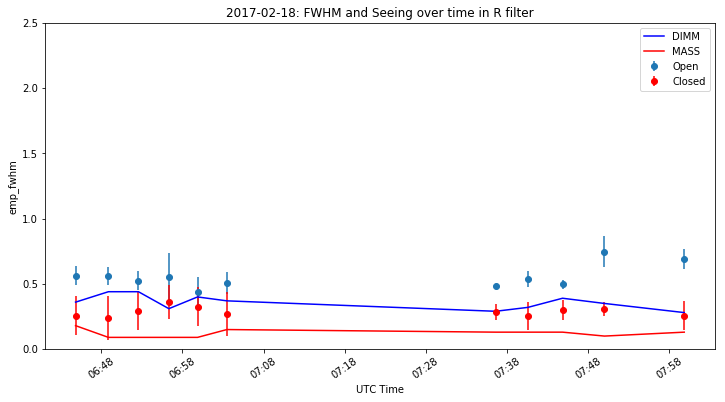

In [16]:
root_dir = "/Users/fatimaabdurrahman/Desktop/Research/RUN4/20170218/FLI/reduce/"; open_file = root_dir + "/stats/stats_open_mdp.fits"; closed_file = root_dir + "/stats/stats_closeda_mdp.fits"; plots_dir = root_dir + "plots/"
plot_stats.plot_fwhmvt(open_file, closed_file, 'emp_fwhm', 658, "2017-02-18: FWHM and Seeing over time in R filter", plots_dir)

# References


King, I. R., "Accuracy of measurement of star images on a pixel array," PASP 95, 163 (1983).

In [3]:
from astropy.table import Table
import add_data
import plot_stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

labels = [['20170214', 'closed', 806], ['20170215', 'closed', 806], ['20170216', 'closeda', 806],['20170217', 'closeda', 1000], ['20170218', 'closeda', 658]]
data_dir_root = "/Users/astrouser/Desktop/Research/imaka/RUN4/"; stats_dir_end = "/FLI/reduce/stats/"


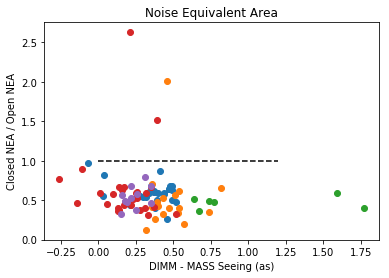

In [9]:
#plt.figure(1, figsize=(6,6))

for item in labels:

    root_dir = data_dir_root + item[0] + stats_dir_end
    open_file = root_dir + "stats_open_mdp.fits"
    closed_file = root_dir + "stats_"+item[1]+"_mdp.fits"

    open_data = Table.read(open_file)
    closed_data = Table.read(closed_file)
    time, date, data1, data2, err1, err2 = add_data.match_cols(open_file, closed_file, 'NEA')

    if len(open_data) >= len(closed_data):
        co_rat = data2/data1 #closed to open ratio of 80% EE
        plt.plot(closed_data['DIMM']-closed_data['MASS'], co_rat, 'o', label=item[0])
    else:
        co_rat = data2/data1 #closed to open ratio of 80% EE
        plt.plot(open_data['DIMM']-open_data['MASS'], co_rat, 'o', label=item[0])

plt.plot([0,1.2],[1,1], 'k--')
plt.xlabel('DIMM - MASS Seeing (as)')
plt.ylabel('Closed NEA / Open NEA')
plt.title('Noise Equivalent Area')
#plt.axis([0, 1.2, 0, 1.2])
#plt.legend(loc=4)